In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

# from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv('mtsamples.csv')
print(df.shape)
df.head()

(4999, 6)


,number,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [5]:
df = df.dropna()
df = df.reset_index(drop=True)
df = df.drop(df.columns[0], axis=1)

In [6]:
print(df.shape)
df.head()

(3898, 5)


,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [7]:
for i,item in enumerate(df['keywords']):
    df['keywords'][i] = item.split(', ')

In [8]:
df['keywords'][10]

['bariatrics',
 'morbid obesity',
 'roux-en-y',
 'gastric bypass',
 'antecolic',
 'antegastric',
 'anastamosis',
 'esophagogastroduodenoscopy',
 'eea',
 'surgidac sutures',
 'roux limb',
 'port',
 'stapler',
 'laparoscopic',
 'intubation']

In [9]:
df['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Dentistry', ' Urology',
       ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Neurology', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic'], dtype=object)

In [10]:
specialty_counts = df['medical_specialty'].value_counts()
mask = df['medical_specialty'].isin(specialty_counts.index[specialty_counts > 40])
df2 = df[mask]

In [11]:
df2.head()

,description,medical_specialty,sample_name,transcription,keywords
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","[cardiovascular / pulmonary, 2-d m-mode, doppl..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"[cardiovascular / pulmonary, 2-d, doppler, ech..."
7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","[cardiovascular / pulmonary, 2-d echocardiogra..."
9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","[cardiovascular / pulmonary, ejection fraction..."
11,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","[cardiovascular / pulmonary, 2-d study, dopple..."


In [12]:
len(df2['medical_specialty'].value_counts())

21

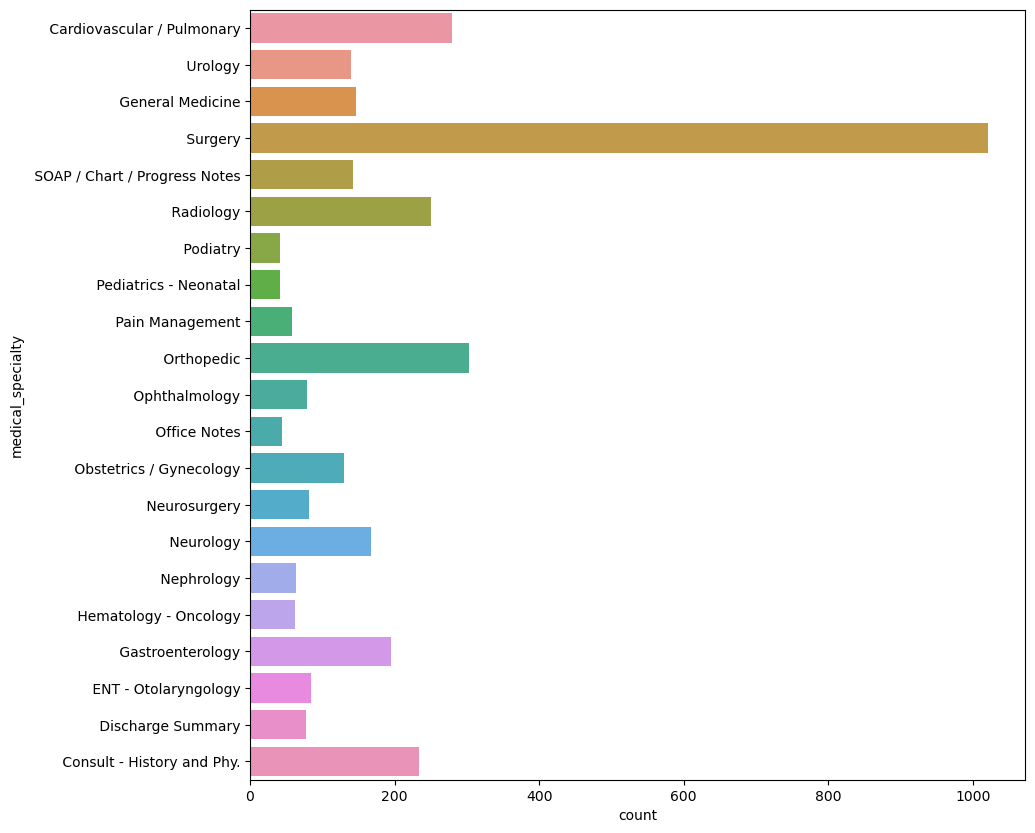

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(y='medical_specialty', data = df2 )
plt.show()

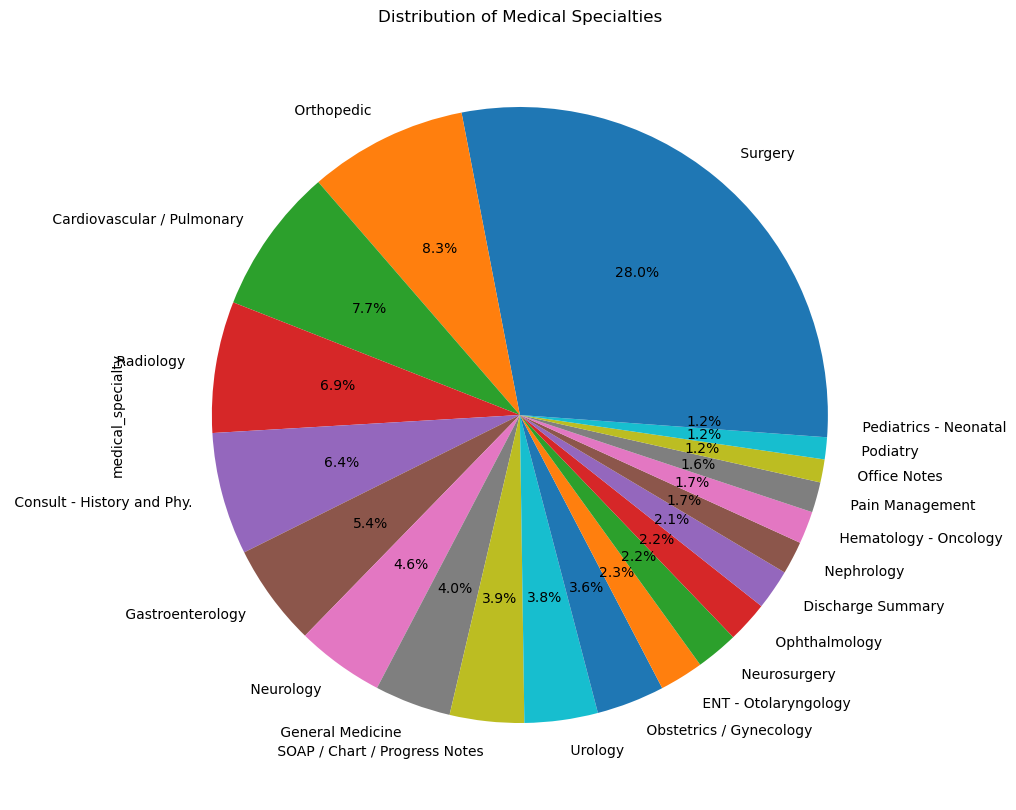

In [14]:
plt.figure(figsize=(10,10))
df2['medical_specialty'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Medical Specialties')
plt.show()

In [15]:
i = 1
print('===========Original Categories in df =======================')
for catName in df['medical_specialty'].unique():
    print('Cat:'+str(i)+' '+catName)
    i = i+1
print('==================================')

===========Original Categories in df =======================
Cat:1  Allergy / Immunology
Cat:2  Bariatrics
Cat:3  Cardiovascular / Pulmonary
Cat:4  Dentistry
Cat:5  Urology
Cat:6  General Medicine
Cat:7  Surgery
Cat:8  Speech - Language
Cat:9  SOAP / Chart / Progress Notes
Cat:10  Sleep Medicine
Cat:11  Rheumatology
Cat:12  Radiology
Cat:13  Psychiatry / Psychology
Cat:14  Podiatry
Cat:15  Physical Medicine - Rehab
Cat:16  Pediatrics - Neonatal
Cat:17  Pain Management
Cat:18  Orthopedic
Cat:19  Ophthalmology
Cat:20  Office Notes
Cat:21  Obstetrics / Gynecology
Cat:22  Neurosurgery
Cat:23  Neurology
Cat:24  Nephrology
Cat:25  Letters
Cat:26  Lab Medicine - Pathology
Cat:27  IME-QME-Work Comp etc.
Cat:28  Hospice - Palliative Care
Cat:29  Hematology - Oncology
Cat:30  Gastroenterology
Cat:31  ENT - Otolaryngology
Cat:32  Endocrinology
Cat:33  Emergency Room Reports
Cat:34  Discharge Summary
Cat:35  Diets and Nutritions
Cat:36  Dermatology
Cat:37  Cosmetic / Plastic Surgery
Cat:38  Consul

In [16]:
i = 1
print('===========Reduced Categories in df2 =======================')
for catName in df2['medical_specialty'].unique():
    print('Cat:'+str(i)+' '+catName)
    i = i+1
print('==================================')

===========Reduced Categories in df2 =======================
Cat:1  Cardiovascular / Pulmonary
Cat:2  Urology
Cat:3  General Medicine
Cat:4  Surgery
Cat:5  SOAP / Chart / Progress Notes
Cat:6  Radiology
Cat:7  Podiatry
Cat:8  Pediatrics - Neonatal
Cat:9  Pain Management
Cat:10  Orthopedic
Cat:11  Ophthalmology
Cat:12  Office Notes
Cat:13  Obstetrics / Gynecology
Cat:14  Neurosurgery
Cat:15  Neurology
Cat:16  Nephrology
Cat:17  Hematology - Oncology
Cat:18  Gastroenterology
Cat:19  ENT - Otolaryngology
Cat:20  Discharge Summary
Cat:21  Consult - History and Phy.


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df2['label'] = label_encoder.fit_transform(df2['medical_specialty'])

C:\Users\monar\AppData\Local\Temp\ipykernel_30520\1558490943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'] = label_encoder.fit_transform(df2['medical_specialty'])


In [18]:
df2.head(10)

,description,medical_specialty,sample_name,transcription,keywords,label
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","[cardiovascular / pulmonary, 2-d m-mode, doppl...",0
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"[cardiovascular / pulmonary, 2-d, doppler, ech...",0
7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","[cardiovascular / pulmonary, 2-d echocardiogra...",0
9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","[cardiovascular / pulmonary, ejection fraction...",0
11,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","[cardiovascular / pulmonary, 2-d study, dopple...",0
15,Neck exploration; tracheostomy; urgent flexib...,Cardiovascular / Pulmonary,Tracheostomy,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...","[cardiovascular / pulmonary, airway, laryngolo...",0
17,Fertile male with completed family. Elective...,Urology,Vasectomy - 4,"PROCEDURE: , Elective male sterilization via b...","[urology, sterilization, vas, fertile male, bi...",20
18,"The patient is a 17-year-old female, who pres...",General Medicine,Airway Compromise & Foreign Body - ER Visit,"HISTORY OF PRESENT ILLNESS:, The patient is a...","[general medicine, diabetes, hypertension, ast...",5
19,Whole body radionuclide bone scan due to pros...,Urology,Whole Body Radionuclide Bone Scan,"INDICATION:, Prostate Cancer.,TECHNIQUE:, 3....","[urology, prostate cancer, technetium, whole b...",20
21,Normal vasectomy,Urology,Vasectomy - 1,"DESCRIPTION:, The patient was placed in the s...","[urology, vasectomy, allis clamp, catgut, hemo...",20


In [19]:
X = df2['transcription']
y = df2['label']

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (2913,)
Shape of X_test: (364,)
Shape of X_val: (365,)
Shape of y_train: (2913,)
Shape of y_test: (364,)
Shape of y_val: (365,)


In [22]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch
from torch import nn, optim

# Load the DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_encoder.classes_))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
# Tokenize the input data
train_tokens = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors='pt')
test_tokens = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors='pt')
val_tokens = tokenizer(X_val.tolist(), padding=True, truncation=True, return_tensors='pt')

In [24]:
X_train

2892    HISTORY OF PRESENT ILLNESS:,  Patient is a thr...
3382    CHIEF COMPLAINT:,  Well-child check.,HISTORY O...
2358    PREOPERATIVE DIAGNOSES:,  ,1.  Recurrent intra...
1876    EXAM:,MRI LEFT SHOULDER,CLINICAL:,This is a 69...
3025    PAST MEDICAL HISTORY: , Significant for arthri...
                              ...                        
1142    PREOPERATIVE DIAGNOSES:,  ,1.  Spondylosis wit...
1314    S -, A 60-year-old female presents today for c...
872     PREOPERATIVE DIAGNOSES:,1.  Clinical stage T2,...
3753    PROCEDURES: , Left heart catheterization, left...
3416    CHIEF COMPLAINT:  ,Penile cellulitis status po...
Name: transcription, Length: 2913, dtype: object

In [ ]:
# Encode the labels as tensors
y_train_tensor = torch.tensor(y_train.tolist())
y_test_tensor = torch.tensor(y_test.tolist())
y_val_tensor = torch.tensor(y_val.tolist())

In [ ]:
# Create DataLoader for training, testing, and validation sets
train_dataset = TensorDataset(train_tokens['input_ids'], train_tokens['attention_mask'], y_train_tensor)
test_dataset = TensorDataset(test_tokens['input_ids'], test_tokens['attention_mask'], y_test_tensor)
val_dataset = TensorDataset(val_tokens['input_ids'], val_tokens['attention_mask'], y_val_tensor)

In [35]:
batch_size = 5

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [36]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

In [37]:
from tqdm import tqdm
# Train the model
epochs = 1

for epoch in range(epochs):
    model.train()
    for batch in tqdm(train_loader):
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()


100%|██████████| 583/583 [38:15<00:00,  3.94s/it]


In [38]:
# Evaluate the model on the validation set
model.eval()
val_loss = 0.0
val_corrects = 0

with torch.no_grad():
    for batch in tqdm(val_loader):
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        val_loss += loss.item()
        _, preds = torch.max(outputs.logits, 1)
        val_corrects += torch.sum(preds == labels)

val_loss /= len(val_loader.dataset)
val_accuracy = val_corrects.double() / len(val_loader.dataset)

print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

100%|██████████| 73/73 [00:54<00:00,  1.34it/s]

Validation Loss: 0.5021, Validation Accuracy: 0.3479


In [39]:
test_loss = 0.0
test_corrects = 0

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        test_loss += loss.item()
        _, preds = torch.max(outputs.logits, 1)
        test_corrects += torch.sum(preds == labels)

test_loss /= len(test_loader.dataset)
test_accuracy = test_corrects.double() / len(test_loader.dataset)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

100%|██████████| 73/73 [00:57<00:00,  1.27it/s]

Test Loss: 0.5254, Test Accuracy: 0.2912
